# TF basics

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'1.10.0'

In [3]:
hello=tf.constant("hello")
print(hello)

Tensor("Const:0", shape=(), dtype=string)


In [5]:
with tf.Session() as sess:
        result=sess.run(hello)

In [6]:
print(result)

b'hello'


In [8]:
a=tf.constant(3)
b=tf.constant(4)
with tf.Session() as sess:
    result=sess.run(a+b)

In [9]:
result

7

# TF Graphs

In [11]:
n1=tf.constant(1)
n2=tf.constant(2)
n3=n1+n2
with tf.Session() as sess:
    result=sess.run(n3)

In [12]:
result

3

In [13]:
sess=tf.InteractiveSession()
tensor=tf.random_normal((4,4))

In [15]:
var=tf.Variable(tensor)
init = tf.global_variables_initializer()
sess.run(init)
sess.run(var)

array([[ 0.44142452, -2.0979962 ,  0.26201788, -0.4709442 ],
       [ 0.8642696 ,  0.18156764, -1.953818  , -0.30107486],
       [-0.9789132 ,  0.70375055, -0.74523497, -0.4195706 ],
       [-1.1118333 , -1.038806  ,  0.5269857 ,  0.7411785 ]],
      dtype=float32)

In [16]:
ph=tf.placeholder(tf.float32,shape=(None,5))

In [17]:
import numpy as np

In [18]:
np.random.seed(101)
tf.set_random_seed(101)

In [19]:
randa=np.random.uniform(0,100,(5,5))

In [20]:
randb=np.random.uniform(0,100,(5,1))

In [22]:
a=tf.placeholder(tf.float32,(5,5))
b=tf.placeholder(tf.float32,(5,1))

In [23]:
add=a+b
mul=a*b
with tf.Session() as sess:
    addresult=sess.run(add,feed_dict={a:randa,b:randb})
    print(addresult)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


# Regression

In [24]:
X_data=np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)

In [25]:
y_data=np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)

In [26]:
import matplotlib.pyplot as plt

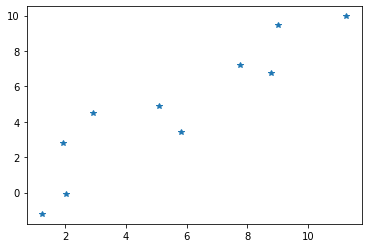

In [28]:
plt.plot(X_data,y_data,'*')

In [34]:
np.random.rand(2)

array([0.72965305, 0.13807229])

In [46]:
m=tf.Variable(.72)
b=tf.Variable(.13)
error=0
for x,y in zip(X_data,y_data):
    y_hat=m*x + b
    error+=(y-y_hat)**2

In [47]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=.001)
train=optimizer.minimize(error)
init = tf.global_variables_initializer()

In [48]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(train)
    newm,newb=sess.run([m,b])

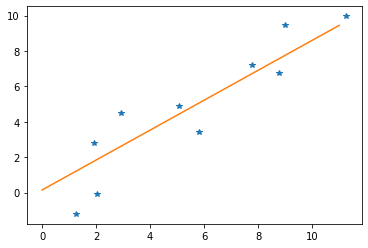

In [49]:
x_test=np.linspace(0,11,10)
pred=x_test*newm+newb
plt.plot(X_data,y_data,'*')
plt.plot(x_test,pred)